In [1]:
import sys
sys.path.append('/lmh_data/work/SEE/train/')
sys.path.append('/lmh_data/work/SEE/analyse/')

import math
import numpy as np
import pandas as pd
import pyBigWig
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

from util import array2mat, mat2array
from analyse_util import figure_size, set_plt, set_Border

In [2]:
genename = 'Slc1a2'
eval_set = np.load('/lmh_data/data/sclab/sclab/mouse/eval_dataset.npy', allow_pickle=True)
preds = np.load('/lmh_data/data/sclab/sclab/mouse/tmp/{}/evaluate.npy'.format(genename), allow_pickle=True)

In [3]:
def show_by_cell_type(cell_type):
    _pred, _target = None, None
    num = 0
    for i in range(len(preds)):
        pred = preds[i]
        if eval_set[i]['cell_type'] != cell_type:
            continue
        num += 1
        if _pred is None:
            _pred = pred['predict'].copy()
            _target = eval_set[i]['scHiC'][genename].copy().astype(float)
        else:
            _pred += pred['predict']
            _target += eval_set[i]['scHiC'][genename].copy().astype(float)
    return _pred/num, _target/num

def _draw(mat, ignore_diag=False, title=None):
    set_plt(figsize=(10, 10))
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots()
    
    if ignore_diag:
        mat = mat.copy()
        np.fill_diagonal(mat, 0)
    ax = sns.heatmap(mat, cmap='Reds_r', square=True)

    set_Border(plt.gca())
    plt.grid(False)
    
    ax.set_xticks([])
    ax.set_yticks([])

    if title:
        plt.savefig(
            '/lmh_data/work/SEE/analyse/figure_file/{}.pdf'.format(title), format='pdf', bbox_inches='tight')
    plt.show()

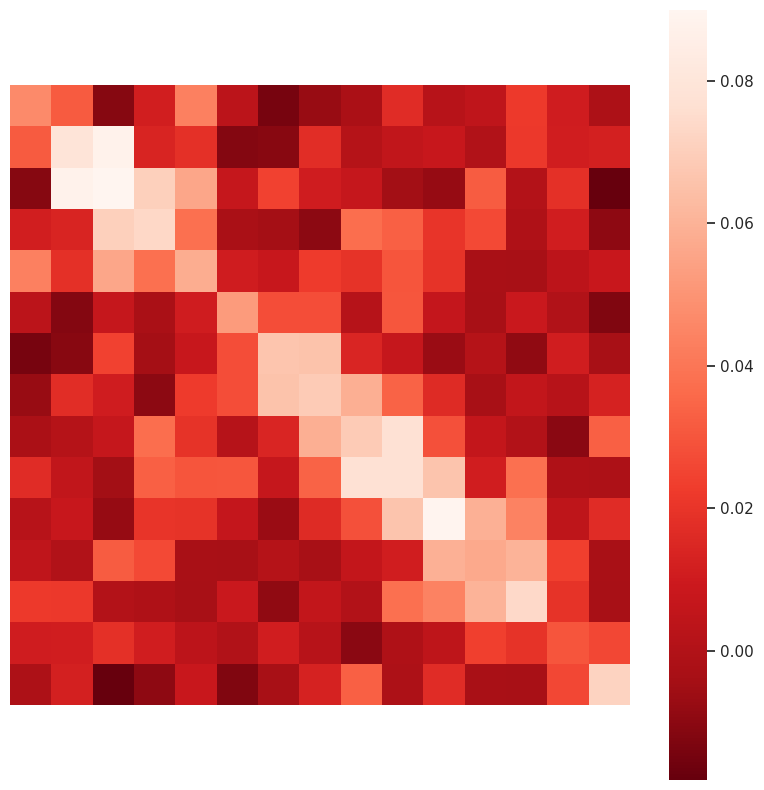

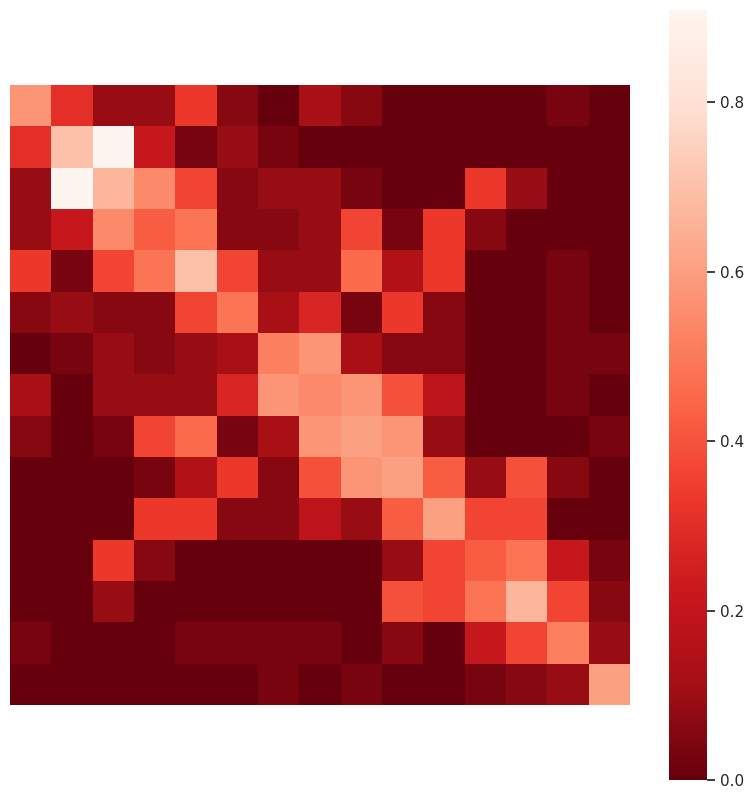

In [4]:
_pred, _target = show_by_cell_type('Astro')
_draw(array2mat(_pred), title='SLC1A2_mouse_Astro_predict')
_draw(array2mat(_target), title='SLC1A2_mouse_Astro_target')

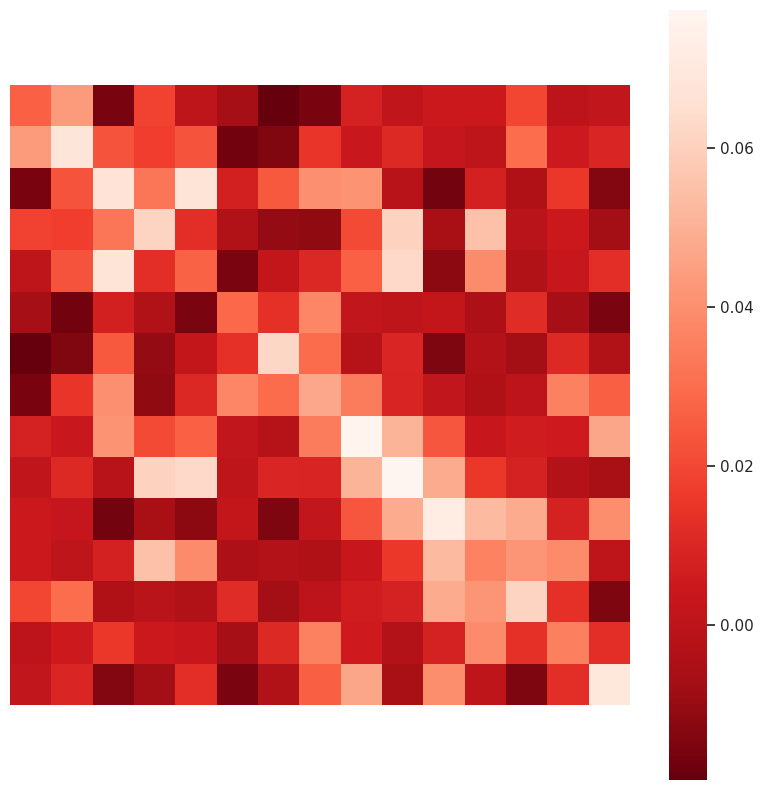

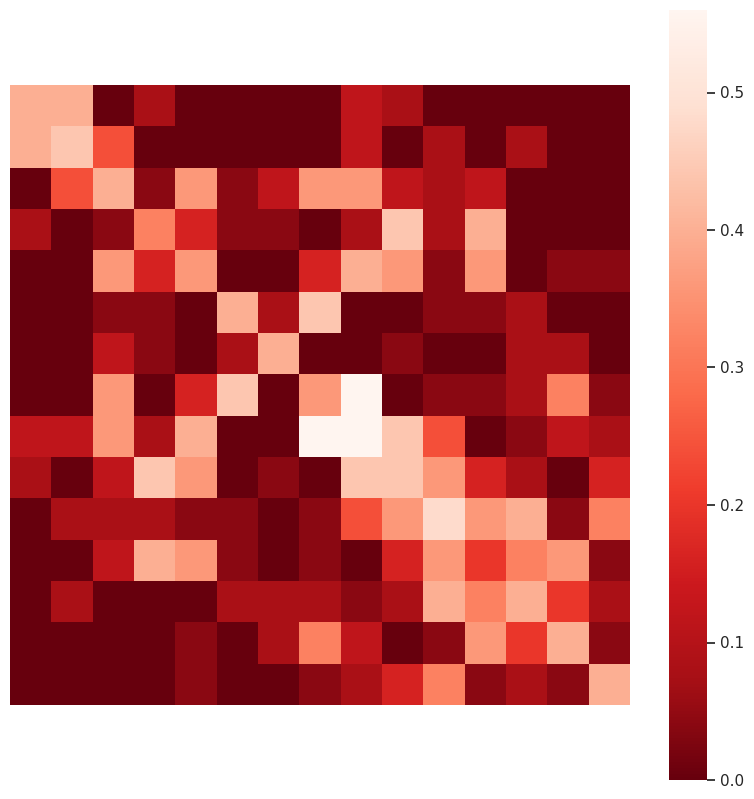

In [5]:
_pred, _target = show_by_cell_type('Micro')
_draw(array2mat(_pred), title='SLC1A2_mouse_Micro_predict')
_draw(array2mat(_target), title='SLC1A2_mouse_Micro_target')

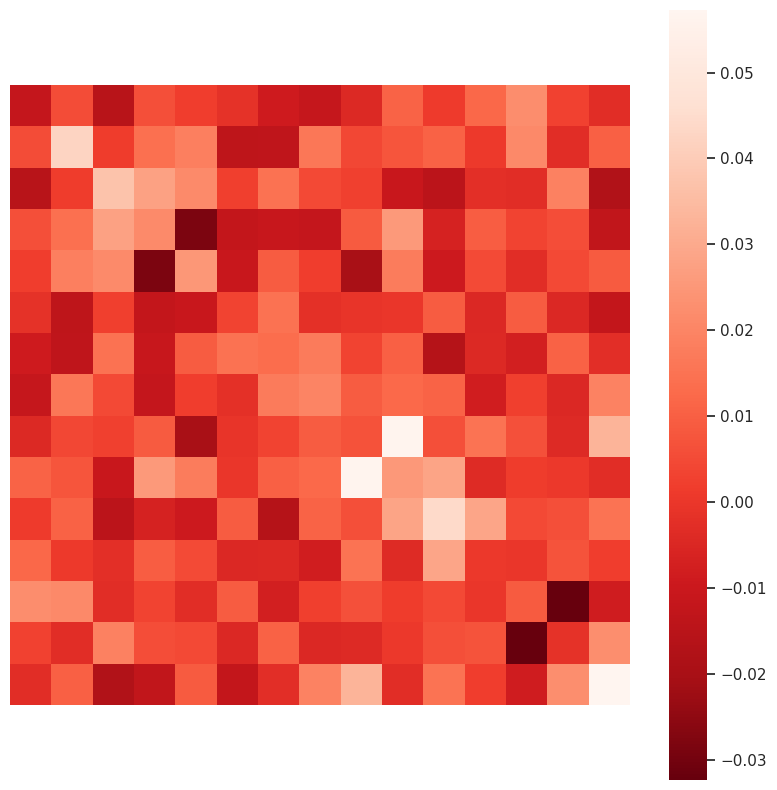

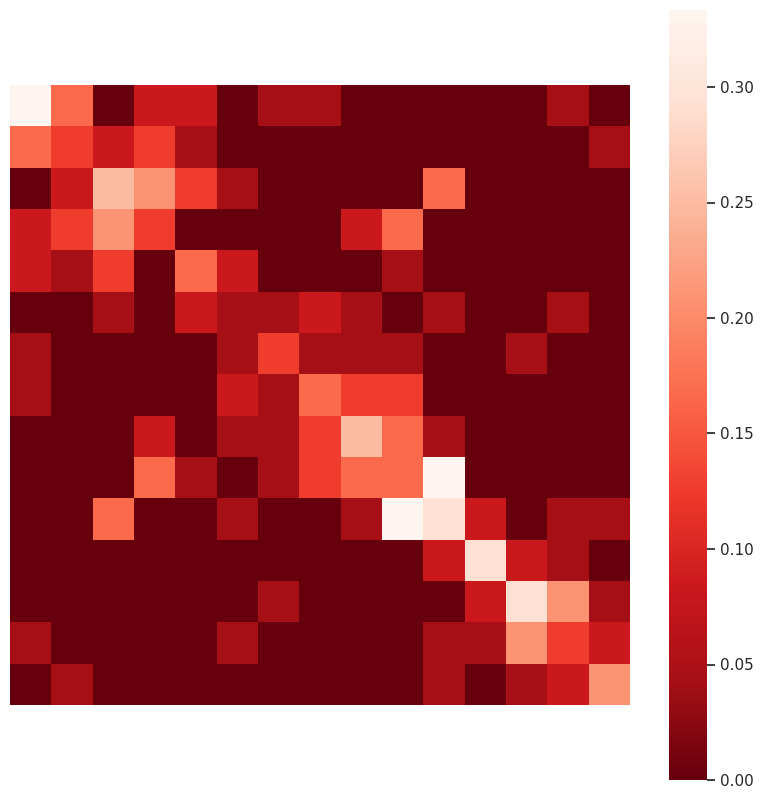

In [6]:
_pred, _target = show_by_cell_type('Oligo')
_draw(array2mat(_pred), title='SLC1A2_mouse_Oligo_predict')
_draw(array2mat(_target), title='SLC1A2_mouse_Oligo_target')